In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
title = "Data/ising-exact-occs-N_s16-J0.2-h1-g0-width1.5-dt0.05.txt"
exact_data = np.loadtxt(title, dtype='float')
title = "Data/ising-trunc-occs-N_s16-J0.2-h1-g0-width1.5-dt0.05.txt"
trunc_data = np.loadtxt(title, dtype='float')

In [36]:
J = 1
h = 1
g = 0
dt = 0.05

In [37]:
len(trunc_data)

301

In [38]:
len(exact_data)

301

In [39]:
N_s = len(exact_data[0])
N_t = len(exact_data)

sites = np.linspace(0, N_s-1, N_s)
times = np.linspace(0, N_t * dt, N_t)
Sites, Times = np.meshgrid(sites, times)

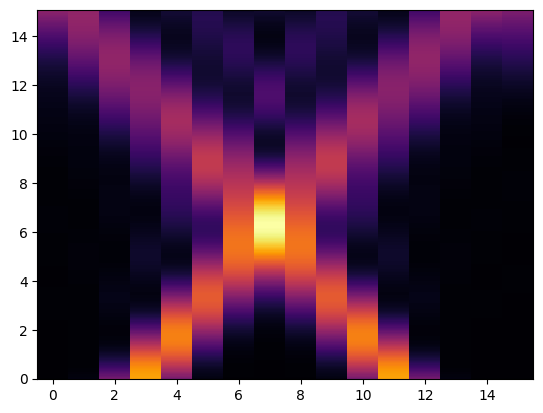

In [43]:
plt.pcolormesh(Sites, Times, exact_data, cmap='inferno')
# plt.xlabel(r'site $j$')
# plt.ylabel(r't')
# title = r'$\langle N_j (t) \rangle$: $N_s = $' + str(N_s)
# title += r', $J = $' + str(J)
# title += r', $h = $' + str(h)
# title += r', $g = $' + str(g)
# title += r', $\Delta t=$' + str(dt)
# plt.title(title)
# plt.colorbar()

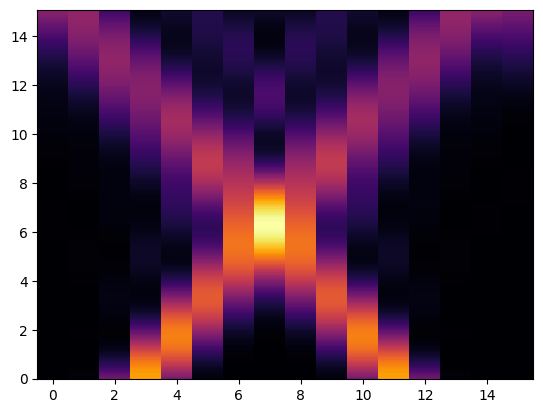

In [41]:
plt.pcolormesh(Sites, Times, trunc_data, cmap='inferno')
# plt.xlabel(r'site $j$')
# plt.ylabel(r't')
# title = r'(a) $\langle N_j (t) \rangle$:'
# title += r' $N_s = $' + str(N_s)
# title += r', $J = $' + str(J)
# title += r', $h = $' + str(h)
# title += r', $g = $' + str(g)
# # title += r', $\Delta t=$' + str(dt)
# plt.title(title)
# plt.colorbar()

Text(0.5, 1.0, 'Absolute Difference: $\\langle N_j \\rangle$: $N_s = $16, $J = $0.2, $h = $1, $g = $0.3')

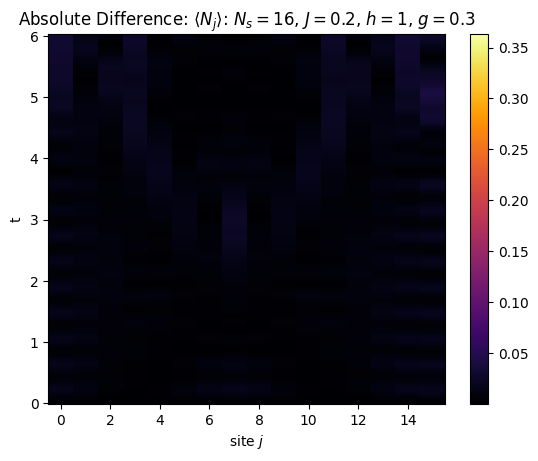

In [65]:
diffs = np.abs(exact_data - trunc_data)
plt.pcolormesh(Sites, Times, diffs, cmap='inferno')
plt.colorbar()
plt.xlabel(r'site $j$')
plt.ylabel(r't')
title = r'Absolute Difference: $\langle N_j \rangle$: $N_s = $' + str(N_s)
title += r', $J = $' + str(J)
title += r', $h = $' + str(h)
title += r', $g = $' + str(g)
plt.title(title)

In [67]:
occs_perc_errs = []
for i in range(N_t-1):
    for j in range(N_s):
        if exact_data[i][j] > 1E-2:
            diff = np.abs(exact_data[i][j] - trunc_data[i][j])
            perc_err = diff / exact_data[i][j] * 100
            occs_perc_errs.append(perc_err)
np.mean(occs_perc_errs)

10.80992652920183

In [83]:
exact_EEs = np.loadtxt("Data/ising-exact-EEs-N_s16-J0.2-h1-g0.3-width1.5-dt0.05.txt", dtype='float')
trunc_EEs = np.loadtxt("Data/ising-trunc-EEs-N_s16-J0.2-h1-g0.3-width1.5-dt0.05.txt", dtype='float')

In [84]:
region = np.linspace(0, N_s-3, N_s-2)
times = np.linspace(0, N_t * dt, N_t)
Region, Times = np.meshgrid(region, times)

In [85]:
region

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13.])

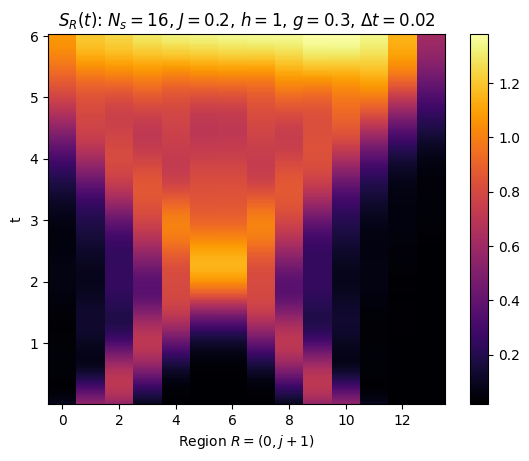

In [86]:
plt.pcolormesh(Region[1:,:], Times[1:,:], exact_EEs[1:,:], cmap='inferno')
plt.xlabel(r'Region $R=(0, j+1)$')
plt.ylabel(r't')
title = r'$S_R (t)$: $N_s = $' + str(N_s)
title += r', $J = $' + str(J)
title += r', $h = $' + str(h)
title += r', $g = $' + str(g)
title += r', $\Delta t=$' + str(dt)
plt.title(title)
plt.colorbar()

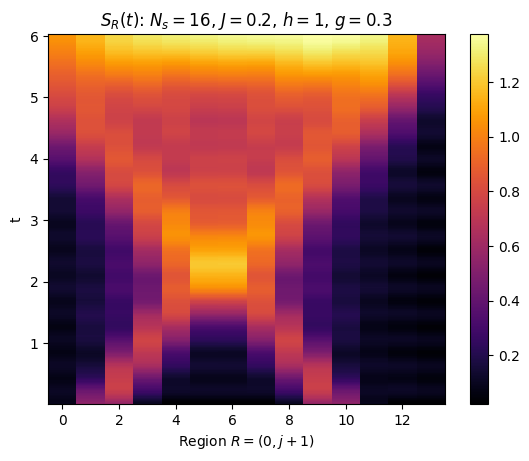

In [87]:
plt.pcolormesh(Region[1:,:], Times[1:,:], trunc_EEs[1:,:], cmap='inferno')
plt.xlabel(r'Region $R=(0, j+1)$')
plt.ylabel(r't')
title = r'$S_R (t)$: $N_s = $' + str(N_s)
title += r', $J = $' + str(J)
title += r', $h = $' + str(h)
title += r', $g = $' + str(g)
# title += r', $\Delta t=$' + str(dt)
plt.title(title)
plt.colorbar()

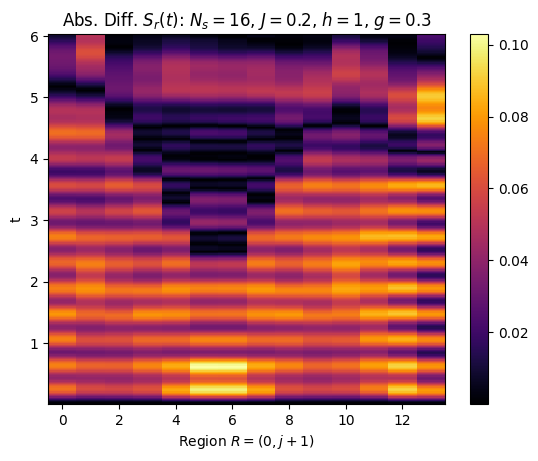

In [88]:
diff = np.abs(exact_EEs[1:,:] - trunc_EEs[1:,:])
plt.pcolormesh(Region[1:,:], Times[1:,:], diff, cmap='inferno')
plt.xlabel(r'Region $R=(0, j+1)$')
plt.ylabel(r't')
title = r'Abs. Diff. $S_r (t)$: $N_s = $' + str(N_s)
title += r', $J = $' + str(J)
title += r', $h = $' + str(h)
title += r', $g = $' + str(g)
# title += r', $\Delta t=$' + str(dt)
plt.title(title)
plt.colorbar()

In [89]:
S_perc_errs = []
for i in range(1,N_t):
        diff = np.abs(exact_EEs[i] - trunc_EEs[i])
        perc_err = diff / exact_EEs[i] * 100
        S_perc_errs.append(perc_err)
np.mean(S_perc_errs)

42.96343849783252